In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #sefa kocakalay

In [6]:
!pip install -U scikit-learn scipy matplotlib
from sklearn.datasets import load_boston
raw_data = load_boston()
print(raw_data.DESCR)

Requirement already up-to-date: scikit-learn in s:\anaconda\lib\site-packages (0.23.2)
Requirement already up-to-date: scipy in s:\anaconda\lib\site-packages (1.5.2)
Requirement already up-to-date: matplotlib in s:\anaconda\lib\site-packages (3.3.2)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner

In [7]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

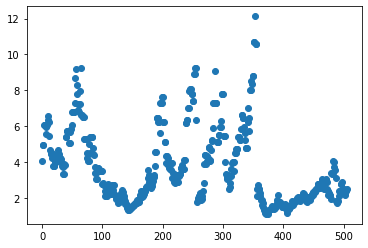

In [9]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

[]

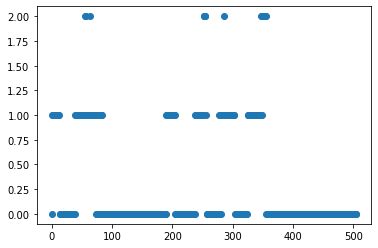

In [10]:
new_DIS, bins = pd.cut(DIS,bins=3,labels=[0,1,2],retbins=True)# y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
                                                                # NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)
plt.plot()

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [11]:
#Equal-frequency
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Cevabınızı bu print içine yazabilirsiniz.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


Cevabınızı bu print içine yazabilirsiniz.


### Soru 

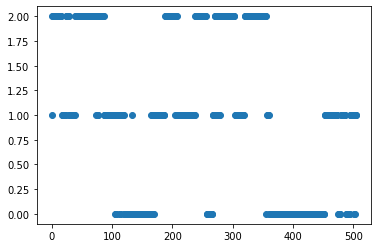

In [14]:
new_DIS, bins = pd.qcut(DIS,q=3,labels=[0,1,2],retbins=True)
# aynı işlemi pd.qcut kullanarak yapın
                # NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [15]:
#equal widht
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Cevabınızı bu print içine yazabilirsiniz.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


Cevabınızı bu print içine yazabilirsiniz.


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [50]:
df["ZN+RM"] = df.ZN+df.RM

In [51]:
df["INDUS-B"] = df.INDUS-df.B

In [52]:
df["AGE/TAX"] = df.AGE/df.TAX

In [53]:
df["CRIM*DIS"] = df.CRIM*df.DIS

In [49]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN+RM,INDUS-B,AGE/TAX,CRIM*DIS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.575,-394.59,0.220270,0.025849
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,6.421,-389.83,0.326033,0.135652
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.185,-385.76,0.252479,0.135552
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,6.998,-392.45,0.206306,0.196233
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,7.147,-394.72,0.244144,0.418595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,6.593,-380.06,0.253114,0.155235
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,6.120,-384.97,0.280952,0.103555
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,6.976,-384.97,0.333333,0.131697
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,6.794,-381.52,0.327106,0.261800


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [57]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
pd.DataFrame(poly.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,589.8000,-9470.160,5.286486,0.620371,-9697.04925,5.413142,0.635234,-86.916446,-10.199678,0.005694
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,138.6936,-8420.328,7.042314,2.930072,-2503.09843,2.093458,0.871018,-127.097467,-52.881025,0.044227
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,249.3195,-13385.872,8.761033,4.703660,-2771.68560,1.814064,0.973942,-97.396430,-52.290601,0.034224
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,233.7332,-13107.830,6.890631,6.554196,-2746.36510,1.443732,1.373241,-80.964910,-77.011803,0.040484
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,258.7214,-14288.864,8.838018,15.153136,-2821.06384,1.744898,2.991698,-96.368577,-165.227783,0.102197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,147.6832,-8513.344,5.669744,3.477258,-2505.73558,1.668778,1.023462,-96.198337,-58.998507,0.039292
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,126.0720,-7930.382,5.787619,2.133236,-2356.01640,1.719429,0.633757,-108.158238,-39.865616,0.029094
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,166.7264,-9200.783,7.966667,3.147565,-2685.55072,2.325333,0.918720,-128.323333,-50.699510,0.043899
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,149.4680,-8393.440,7.196337,5.759590,-2592.04688,2.222360,1.778666,-124.797568,-99.881765,0.085636


# Normalizasyon

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df)

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        3.79282022e-03, 4.12749432e-01, 0.00000000e+00],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.52920713e-02, 6.22799992e-01, 8.28532549e-04],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        2.51244142e-02, 4.76718367e-01, 8.27782949e-04],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        2.70329033e-02, 6.37298730e-01, 7.98695539e-04],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        3.53674446e-02, 6.24931364e-01, 1.78040135e-03],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        2.70329033e-02, 5.63094531e-01, 7.01090694e-04]])

sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sss = scaler.fit_transform(df)

sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [67]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(df)

array([[-0.06959315,  1.44      , -0.57164988, ..., -0.60736609,
         0.62130535, -0.13694423],
       [-0.06375455,  0.        , -0.20294345, ..., -0.42427156,
         1.55842561, -0.12210151],
       [-0.06376011,  0.        , -0.20294345, ..., -0.26771805,
         0.90669656, -0.12211494],
       ...,
       [-0.05445006,  0.        ,  0.17350891, ..., -0.23733051,
         1.62311032, -0.12263602],
       [-0.04086745,  0.        ,  0.17350891, ..., -0.10462544,
         1.56793451, -0.10504928],
       [-0.05816351,  0.        ,  0.17350891, ..., -0.23733051,
         1.29205547, -0.12438456]])

# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


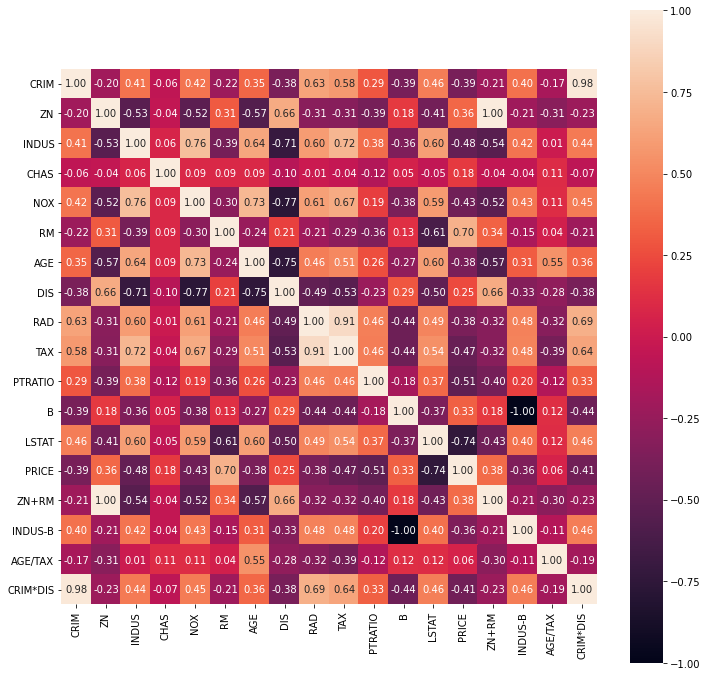

In [68]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

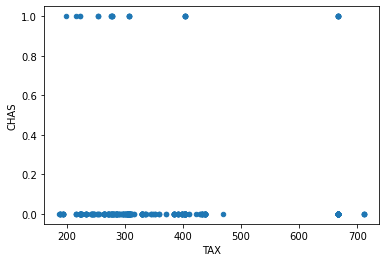

In [69]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

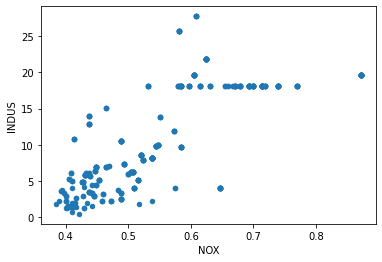

INDUS proportion of non-retail business acres per town
NOX nitric oxides concentration
 Nitrik Oksit konstantrasyonun işleri etkiliyor gibi gözüküyor fazla olduğu yerlerde perakende dışı iş dönümleri daha fazla oluyor


In [74]:
df.plot.scatter("NOX","INDUS")
plt.show()

print("INDUS proportion of non-retail business acres per town\nNOX nitric oxides concentration\n Nitrik Oksit konstantrasyonun işleri etkiliyor gibi gözüküyor fazla olduğu yerlerde perakende dışı iş dönümleri daha fazla oluyor")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

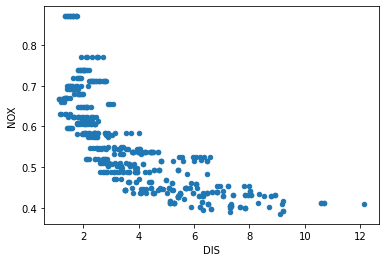

DIS weighted distances to five Boston employment centres
NOX nitric oxides concentration
Boston istihdam merkezine mesafe fazlaysa nitrik oksit konsantrasyonu düşüktür


In [76]:
df.plot.scatter("DIS","NOX")
plt.show()
print("DIS weighted distances to five Boston employment centres\nNOX nitric oxides concentration\nBoston istihdam merkezine mesafe fazlaysa nitrik oksit konsantrasyonu düşüktür")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

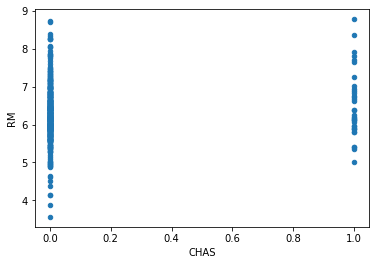

düşük korelasyon


In [80]:
df.plot.scatter("CHAS","RM")
plt.show()
print("düşük korelasyon")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

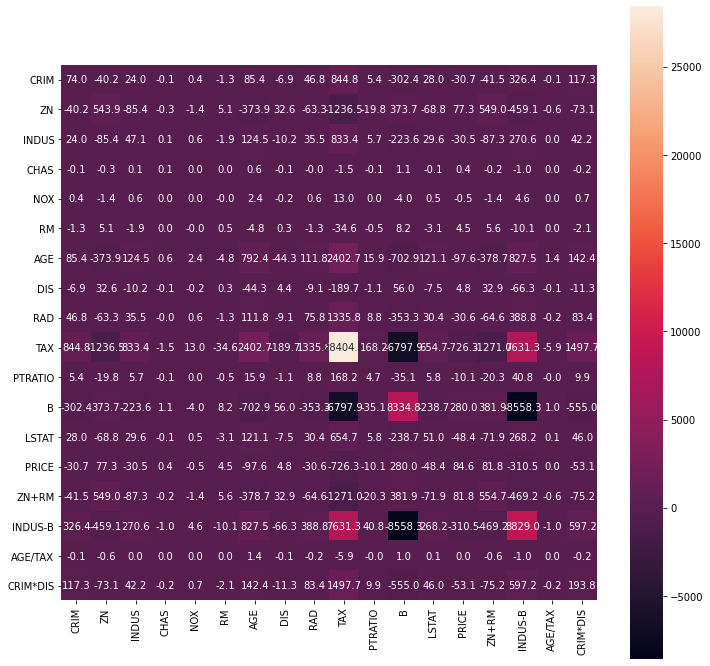

In [83]:
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(), square=True, annot=True, fmt='.1f')
plt.show()

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

In [100]:
df_sss = pd.DataFrame(sss,columns=df.columns)
df_sss

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,ZN+RM,INDUS-B,AGE/TAX,CRIM*DIS
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,0.294406,-0.522562,0.423681,-0.490702
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,-0.477191,-0.471853,1.606837,-0.482807
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,-0.444719,-0.428495,0.784000,-0.482814
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,-0.452667,-0.499764,0.267468,-0.478451
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,-0.446334,-0.523947,0.690756,-0.462462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454,-0.469880,-0.367773,0.791095,-0.481399
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362,-0.489984,-0.420079,1.102525,-0.485115
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802,-0.453602,-0.420079,1.688504,-0.483091
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989,-0.461337,-0.383326,1.618843,-0.473737


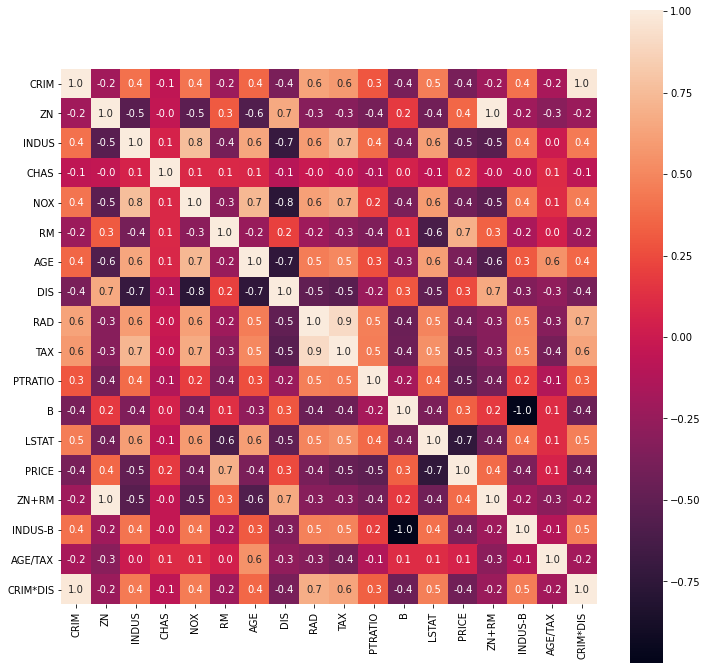

In [99]:
# Heatmap için python kodunu bu hücreye yazın
plt.figure(figsize=(12,12))
sns.heatmap(df_sss.cov(), square=True, annot=True, fmt='.1f')
plt.show()
# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)